In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(777)

In [3]:
mean = 0
sta_dev = 1
number = 100

In [4]:
plt.rcParams["font.size"] = 16

In [5]:
f = lambda x: (math.exp(-(x-mean)**2/ (2 * (sta_dev**2))) / math.sqrt(2*math.pi*(sta_dev**2)))

# ベクトルxを [-5.0,..., 5.0] の区間で作成
n = np.linspace(-4.0, 4.0, 10000)

# f(x)の結果を得る
p = []
for i in range(len(n)):
    p.append(f(n[i]))
    
p = np.asarray(p)

In [6]:
x = np.random.normal(mean, sta_dev, number)

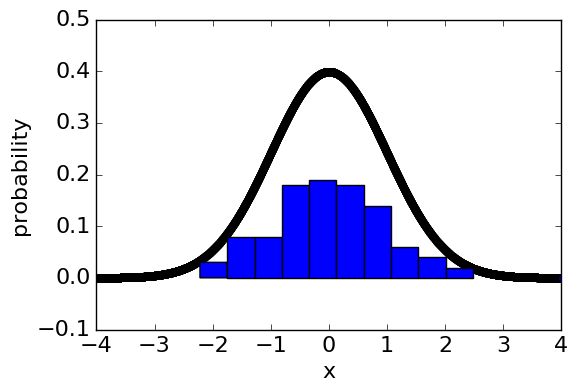

In [7]:
weights = np.ones_like(x) / (len(x))
plt.hist(x, bins=10, weights = weights)
plt.scatter(n, p)
plt.xlim(-4, 4)
plt.xlabel("x")
plt.ylabel("probability")
plt.savefig("small_sample.png")

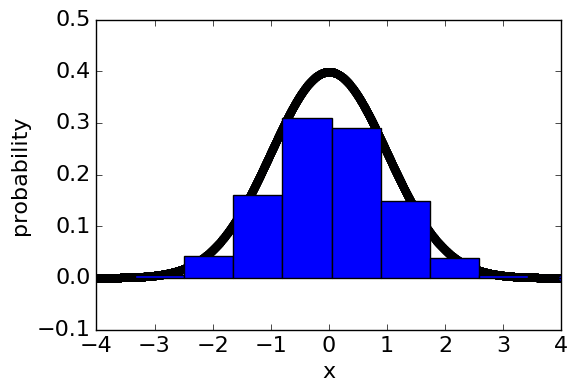

In [8]:
number = 10000
x = np.random.normal(mean, sta_dev, number)
weights = np.ones_like(x) / (len(x))
plt.hist(x, bins=10, weights = weights)
plt.scatter(n, p)
plt.xlim(-4, 4)
plt.xlabel("x")
plt.ylabel("probability")
plt.savefig("big_sample.png")
plt.show()

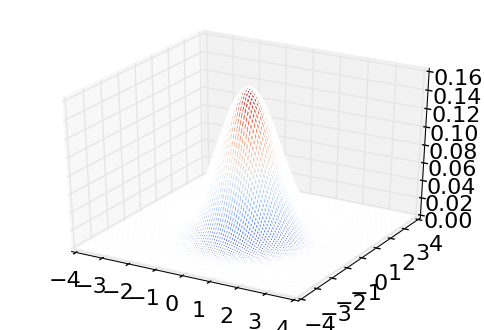

In [36]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
x = y = np.linspace(-4.0, 4.0, 100)
X, Y = np.meshgrid(x, y)
 
#平均と分散
mu = np.array([0,0])
sigma = np.array([[1,0],
                  [0,1]])
 
#行列式
det = np.linalg.det(sigma)
 
#逆行列
inv_sigma = np.linalg.inv(sigma)
 
#ガウス二次元確率密度を返す関数
def f(x, y):
    x_c = np.array([x, y]) - mu
    return np.exp(- x_c.dot(inv_sigma).dot(x_c[np.newaxis, :].T) / 2.0) / (2*np.pi*np.sqrt(det))
 
#配列それぞれ対応するものを返す関数に変える
Z = np.vectorize(f)(X,Y)
 
 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,edgecolors='w')
plt.savefig("2d_distribution.png")
plt.show()

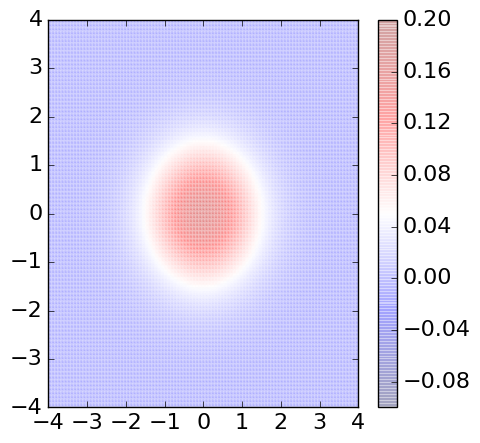

In [37]:
plt.figure(figsize=(5, 5))
sc = plt.scatter(X, Y, vmin=-0.1, vmax=0.2, alpha=0.2, c=Z, cmap=cm.seismic, edgecolors="w")
plt.colorbar(sc)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.savefig("2d_2d_no_cov.png")
plt.show()

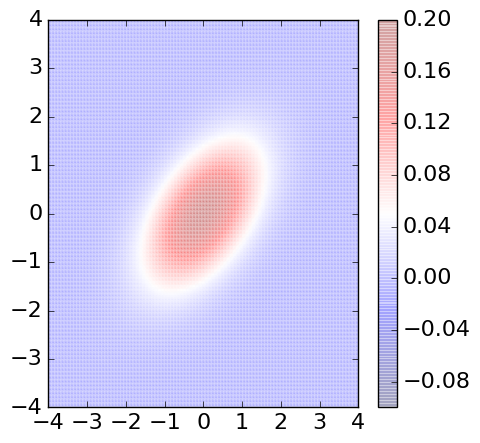

In [38]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
 

x = y = np.linspace(-4.0, 4.0, 100)
X, Y = np.meshgrid(x, y)
 
#平均と分散
mu = np.array([0,0])
sigma = np.array([[1,0.5],
                  [0.5,1]])
 
#行列式
det = np.linalg.det(sigma)
 
#逆行列
inv_sigma = np.linalg.inv(sigma)
 
#ガウス二次元確率密度を返す関数
def f(x, y):
    x_c = np.array([x, y]) - mu
    return np.exp(- x_c.dot(inv_sigma).dot(x_c[np.newaxis, :].T) / 2.0) / (2*np.pi*np.sqrt(det))
 
#配列それぞれ対応するものを返す関数に変える
Z = np.vectorize(f)(X,Y)
 
 
plt.figure(figsize=(5, 5))
sc = plt.scatter(X, Y, vmin=-0.1, vmax=0.2, alpha=0.2, c=Z, cmap=cm.seismic, edgecolors="w")
plt.colorbar(sc)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.savefig("2d_2d_cov.png")
plt.show()

In [31]:
x = np.random.normal(mean, sta_dev, number*2)

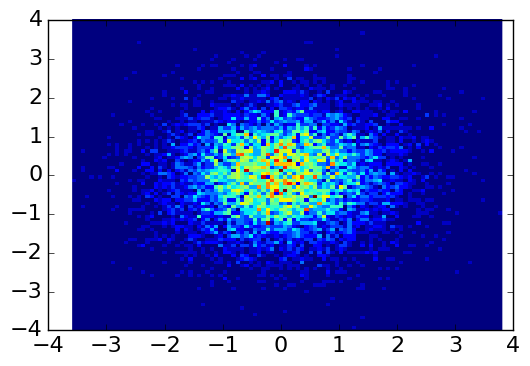

In [32]:
data = plt.hist2d(x[:number], x[number:], bins = 100)
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()

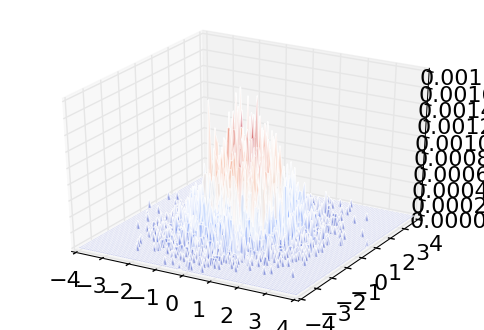

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, data[0]/(len(data[0])**2), rstride=1, cstride=1, cmap=cm.coolwarm, alpha = 0.5, edgecolors='w')
plt.savefig("2d_distribution2.png")
plt.show()

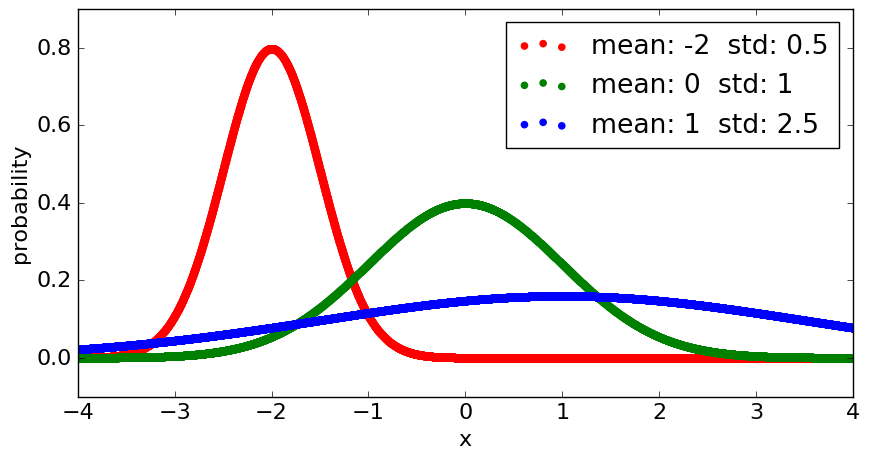

In [34]:
x = [-2, 0, 1]
y = [0.5, 1, 2.5]
colors = ["r", "g", "b"]
plt.figure(figsize=(10,5))
for mean, sta_dev, color in zip(x, y, colors):
    f = lambda x: (math.exp(-(x-mean)**2/ (2 * (sta_dev**2))) / math.sqrt(2*math.pi*(sta_dev**2)))
    # f(x)の結果を得る
    p = []
    for i in range(len(n)):
        p.append(f(n[i]))

    p = np.asarray(p)
    plt.scatter(n, p, edgecolors=color, c=color, label="mean: "+str(mean)+"  std: "+str(sta_dev))
plt.xlim(-4, 4)
plt.legend()
plt.xlabel("x")
plt.ylabel("probability")
plt.savefig("various_normal.png")
plt.show()